# Eric Greiner - IS669 - Euclidean-Distance_Classifier

# Part I - Synthetic Data Generation

In [ ]:
import random
import math
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
originalData = pd.read_csv("dataSample.csv")

In [ ]:
originalData

,classType,length,beam,draft,pressure,vortex,magnetic,light
0,Yuan,62.08,7.98,5.03,534.56,965.18,17.21,0.94
1,Yuan,73.72,8.40,6.37,835.25,463.29,15.49,1.06
2,Yuan,77.60,6.30,6.70,890.93,463.29,17.21,0.56
3,Yuan,77.60,6.72,5.03,534.56,463.29,13.77,0.56
4,Yuan,69.84,6.72,5.36,1113.67,965.18,8.26,1.06
5,Xia,96.00,4.80,6.40,3157.92,1697.28,57.60,14.40
6,Xia,96.00,8.00,6.00,3508.80,1909.44,51.84,14.40
7,Xia,57.60,4.80,7.20,3157.92,1909.44,43.20,14.40
8,Xia,114.00,4.80,7.60,3333.36,1697.28,54.72,17.10
9,Xia,90.00,9.00,7.60,2631.60,1018.37,43.20,16.20


In [3]:
import random
from enum import Enum

In [4]:
class fileTypes(Enum):
  excel = 1
  csv=2
  json=3
  pickle=4

class Submarine():
  def __init__(self,data,classType,sampleIdentifier):
    self.data = data
    self.classType=classType
    self.generatedData = []
    self.sampleIdentifier = sampleIdentifier
    
  def generate(self,n):
    numberOfData = len(self.generatedData)
    for j in range(n):
      newSample = {"classType":self.classType,"sampleId":self.sampleIdentifier+"-"+str(numberOfData+j+1)}
      for i in self.data.columns[1:]:
        min = self.data[i].min()
        max = self.data[i].max()
        mean = self.data[i].mean()
        newValue = random.uniform(min,max)+((mean/(max-min)) * random.uniform(0.01,0.1))
        newSample[i] = newValue
      
      self.generatedData.append(newSample)
    self.pdData = pd.DataFrame(self.generatedData)
  def toVector(self):
    
    return self.pdData.values
  def toShaped(self):
    return self.pdData

  def store(self,fileName,fileFormat):
    if fileFormat==fileTypes.excel:
        self.pdData.to_excel(fileName+".xlsx")
    if fileFormat==fileTypes.csv:
        self.pdData.to_csv(fileName+".csv ")       
    if fileFormat==fileTypes.json:
        self.pdData.to_json(fileName+".json ")
    if fileFormat==fileTypes.pickle:
        self.pdData.to_pickle(fileName+".pckl ")  

class Yuan(Submarine):
  def __init__(self,data):
    super().__init__(data,"Yuan","YSN")

class Xia(Submarine):
  def __init__(self,data):
    super().__init__(data,"Xia","XSN")


# Part II - Data Archiving

In [ ]:
originalYuanSamples = originalData[originalData["classType"]=="Yuan"]
originalXiaSamples = originalData[originalData["classType"]=="Xia"]
_yuan = Yuan(originalYuanSamples)
_xia = Xia(originalXiaSamples)

In [ ]:
_yuan.generate(1000)
_yuan.toVector()

fileName = "yuan"

_yuan.store(fileName,fileTypes.excel)
_yuan.store(fileName,fileTypes.json)
_yuan.store(fileName,fileTypes.csv)
_yuan.store(fileName,fileTypes.pickle)

In [ ]:
_xia.generate(1000)
_xia.toVector()

fileName = "xia"

_xia.store(fileName,fileTypes.excel)
_xia.store(fileName,fileTypes.json)
_xia.store(fileName,fileTypes.csv)
_xia.store(fileName,fileTypes.pickle)

# Part III - Data Shaping

In [ ]:
shapedXia = _xia.toShaped()
shapedYuan = _yuan.toShaped()

In [ ]:
shapedXia.head()

,classType,sampleId,length,beam,draft,pressure,vortex,magnetic,light
0,Xia,XSN-1,114.026094,6.871377,6.903848,2784.376251,1745.055845,54.449545,15.442677
1,Xia,XSN-2,111.047326,7.782371,7.737516,2884.946240,1683.376225,50.831600,15.722718
2,Xia,XSN-3,95.926057,8.443556,6.582085,2646.039028,1344.829601,48.562252,15.721797
3,Xia,XSN-4,91.133894,5.687423,6.714445,3005.319540,1873.275953,50.401723,15.246061
4,Xia,XSN-5,110.662289,8.885017,7.888344,3482.006037,1280.799067,52.088571,16.084204


In [ ]:
shapedXia.describe()

,length,beam,draft,pressure,vortex,magnetic,light
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,86.110195,6.934631,7.030614,3058.648963,1463.348618,50.594892,16.102395
std,16.198054,1.204779,0.465658,253.049119,260.641962,4.084005,0.781029
min,57.728369,4.819302,6.048768,2633.741739,1019.441262,43.385487,14.513488
25%,72.527090,5.904496,6.632394,2845.994761,1235.363998,47.152980,15.463941
50%,85.906370,6.943012,7.020552,3037.652619,1458.034749,50.590868,16.102156
75%,99.843297,7.954664,7.416613,3279.854501,1689.686401,54.109025,16.772505
max,114.026687,9.121761,8.004756,3508.280720,1908.771526,57.865340,17.647834


In [ ]:
shapedYuan.head()

,classType,sampleId,length,beam,draft,pressure,vortex,magnetic,light
0,Yuan,YSN-1,73.721918,7.168572,6.445035,638.846112,480.013135,11.807041,0.732041
1,Yuan,YSN-2,73.730237,6.927072,5.315884,765.411858,660.928210,14.095569,0.695893
2,Yuan,YSN-3,64.026850,7.030980,5.914005,885.478912,486.807958,8.934826,0.674695
3,Yuan,YSN-4,77.383213,7.179935,5.941756,1004.075710,634.460552,8.533356,0.822738
4,Yuan,YSN-5,76.908037,7.836291,6.435579,636.024248,566.595453,10.234846,1.137746


In [ ]:
shapedYuan.describe()

,length,beam,draft,pressure,vortex,magnetic,light
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.052333,7.518004,6.048530,825.091204,714.020925,12.786053,0.905225
std,4.445508,0.630023,0.490279,166.700658,142.704561,2.586399,0.147433
min,62.259571,6.355685,5.090542,534.843642,463.698081,8.319714,0.584033
25%,66.290149,6.953490,5.620459,687.467480,589.442118,10.553603,0.788987
50%,69.952991,7.547782,6.062973,829.249783,709.053111,12.604617,0.906477
75%,73.861761,8.066997,6.457534,967.590246,834.719801,15.044322,1.025671
max,78.044584,8.735416,7.024254,1113.342885,963.207549,17.349034,1.219679


In [ ]:
shapedYuan.pop("classType")
shapedYuan.pop("sampleId")
shapedXia.pop("classType")
shapedXia.pop("sampleId")

0         XSN-1
1         XSN-2
2         XSN-3
3         XSN-4
4         XSN-5
         ...   
995     XSN-996
996     XSN-997
997     XSN-998
998     XSN-999
999    XSN-1000
Name: sampleId, Length: 1000, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
yuanTrain, yuanTest = train_test_split(shapedYuan,test_size=0.3)
xiaTrain, xiaTest = train_test_split(shapedXia,test_size=0.3)

print("For Yuan, Train Samples = {}, Test Samples = {}".format(len(yuanTrain),len(yuanTest)))
print("For Xia, Train Samples = {}, Test Samples = {}".format(len(xiaTrain),len(xiaTest)))

For Yuan, Train Samples = 700, Test Samples = 300
For Xia, Train Samples = 700, Test Samples = 300


# Part IV - Normalize Data

In [ ]:
fullTrainData = pd.concat([yuanTrain,xiaTrain],ignore_index=True)

In [ ]:
for i in fullTrainData.columns:
  mean = fullTrainData[i].mean()
  std = fullTrainData[i].std() 

  yuanTrain[i] = (yuanTrain[i]-mean)/std
  yuanTest[i] =  (yuanTest[i]-mean)/std
  xiaTrain[i] = (xiaTrain[i]-mean)/std
  xiaTest[i] = (xiaTest[i]-mean)/std

In [ ]:
yuanTrain.head()

,length,beam,draft,pressure,vortex,magnetic,light
869,-1.032713,0.697029,-1.460819,-0.842315,-0.340351,-0.756779,-1.002852
188,-0.686138,1.121031,-1.819966,-0.895755,-1.238592,-1.165307,-1.016538
467,-0.885358,-0.481693,-1.346108,-1.108744,-0.863165,-1.138297,-0.995061
407,-0.686395,0.092312,-2.029481,-1.219585,-1.249525,-1.135875,-1.001452
565,-0.189754,0.951207,0.062630,-1.078354,-1.434294,-1.089206,-1.003495


In [ ]:
xiaTrain.head()

,length,beam,draft,pressure,vortex,magnetic,light
428,0.701379,-0.257342,-0.579133,1.232923,0.599240,1.043721,1.151196
947,0.837761,0.735553,-0.088848,0.656731,1.430215,1.021379,0.976678
398,-1.228533,0.704931,0.897764,0.972859,1.270030,0.913541,1.076340
326,1.255469,1.601875,1.273897,0.767642,1.380478,0.851504,0.962558
610,1.488836,1.035208,-0.067637,1.232944,0.599114,0.958584,1.049307


# Part V - Template Creation

In [ ]:
xiaTrain.describe()

,length,beam,draft,pressure,vortex,magnetic,light
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.567414,-0.282535,0.719180,0.981996,0.866861,0.983331,0.996911
std,1.122211,1.201220,0.672665,0.220095,0.619187,0.215414,0.102714
min,-1.428660,-2.419390,-0.704520,0.601252,-0.157234,0.612524,0.787599
25%,-0.344112,-1.304296,0.151274,0.800979,0.320071,0.794222,0.912379
50%,0.567926,-0.250871,0.690991,0.971541,0.849593,0.983448,0.999690
75%,1.491962,0.737107,1.270152,1.170802,1.413857,1.167691,1.084910
max,2.500434,1.822641,2.116720,1.367180,1.929488,1.369305,1.192175


In [ ]:
yuanTrain.describe()

,length,beam,draft,pressure,vortex,magnetic,light
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,-0.567414,0.282535,-0.719180,-0.981996,-0.866861,-0.983331,-0.996911
std,0.311825,0.631363,0.716262,0.146966,0.336141,0.135576,0.019308
min,-1.112216,-0.891753,-2.091321,-1.236980,-1.461228,-1.216212,-1.039120
25%,-0.834559,-0.297351,-1.343989,-1.103706,-1.155367,-1.095617,-1.011773
50%,-0.576527,0.353792,-0.698368,-0.986406,-0.862774,-0.998014,-0.996872
75%,-0.300541,0.828500,-0.130432,-0.856074,-0.567046,-0.862112,-0.981210
max,-0.009845,1.474431,0.700903,-0.730325,-0.289180,-0.748255,-0.955761


In [ ]:
yuanMeanVector = yuanTrain.mean()
xiaMeanVector = xiaTrain.mean()


In [ ]:
xiaMeanVector

length      0.567414
beam       -0.282535
draft       0.719180
pressure    0.981996
vortex      0.866861
magnetic    0.983331
light       0.996911
dtype: float64

In [ ]:
yuanMeanVector

length     -0.567414
beam        0.282535
draft      -0.719180
pressure   -0.981996
vortex     -0.866861
magnetic   -0.983331
light      -0.996911
dtype: float64

# Part VI - Distance Calculations

In [62]:
def distance(a,b):
  sum = 0
  for i in a.keys():
    sum += (a[i] - b[i])**2
  return math.sqrt(sum)


In [63]:
yuanTrain["distance"] = 0.0
for index, row in yuanTrain.iterrows():
   d = distance(yuanMeanVector,row)
   yuanTrain.at[index,"distance"] = d

In [64]:
xiaTrain["distance"] = 0.0
for index, row in xiaTrain.iterrows():
   d = distance(xiaMeanVector,row)
   xiaTrain.at[index,"distance"] = d

In [65]:
yuanTrain["distance"]

869    1.134205
188    1.451902
467    1.057482
407    1.411878
565    1.242375
         ...   
853    1.391837
379    1.465134
717    1.419522
233    0.788142
786    0.938678
Name: distance, Length: 700, dtype: float64

In [ ]:
xiaTrain["distance"]

428    1.366102
947    1.479027
398    2.099098
326    2.158805
610    1.828270
         ...   
755    1.098722
108    2.178158
652    2.063760
282    2.042424
372    2.511165
Name: distance, Length: 700, dtype: float64

In [ ]:
yuanDistance = {}

yuanDistance["min"] = yuanTrain["distance"].min()
yuanDistance["max"] = yuanTrain["distance"].max()
yuanDistance["range_a"] = yuanTrain["distance"].max() - yuanTrain["distance"].min()
yuanDistance["range_b"] = len(yuanTrain)
yuanDistance["mean"] = yuanTrain["distance"].mean()
yuanDistance["median"] = yuanTrain["distance"].median()
yuanDistance["variation"] = yuanTrain["distance"].var()
yuanDistance["standartDeviation"] = yuanTrain["distance"].std()


In [ ]:
xiaDistance = {}

xiaDistance["min"] = xiaTrain["distance"].min()
xiaDistance["max"] = xiaTrain["distance"].max()
xiaDistance["range_a"] = xiaTrain["distance"].max() - xiaTrain["distance"].min()
xiaDistance["range_b"] = len(xiaTrain)
xiaDistance["mean"] = xiaTrain["distance"].mean()
xiaDistance["median"] = xiaTrain["distance"].median()
xiaDistance["variation"] = xiaTrain["distance"].var()
xiaDistance["standartDeviation"] = xiaTrain["distance"].std()

In [ ]:
yuanDist = pd.DataFrame(data=yuanDistance,index=[0])
yuanDist

,min,max,range_a,range_b,mean,median,variation,standartDeviation
0,0.292279,1.727048,1.434769,700,1.039712,1.04872,0.07968,0.282277


In [66]:
xiaDist = pd.DataFrame(data=xiaDistance,index=[0])
xiaDist

,min,max,range_a,range_b,mean,median,variation,standartDeviation
0,0.558557,3.02694,2.468383,700,1.841209,1.872661,0.248654,0.498652


# Part VIII - Threshold Selection

In [41]:
yuanTrain["LT"] = 0
yuanTrain["LTE"] = 0
yuanTrain["ET"] = 0
yuanTrain["GT"] = 0

for index,row in yuanTrain.iterrows():
  yuanTrain.at[index,"LT"] = 1 if row["distance"]<float(yuanDist["mean"]) else 0
  yuanTrain.at[index,"LTE"] = 1 if row["distance"]<=float(yuanDist["mean"]) else 0
  yuanTrain.at[index,"ET"] = 1 if row["distance"]==float(yuanDist["mean"]) else 0
  yuanTrain.at[index,"GT"] = 1 if row["distance"]>float(yuanDist["mean"]) else 0

yuanTrain[["distance","LT","LTE","ET","GT"]]

,distance,LT,LTE,ET,GT
869,1.134205,0,0,0,1
188,1.451902,0,0,0,1
467,1.057482,0,0,0,1
407,1.411878,0,0,0,1
565,1.242375,0,0,0,1
...,...,...,...,...,...
853,1.391837,0,0,0,1
379,1.465134,0,0,0,1
717,1.419522,0,0,0,1
233,0.788142,1,1,0,0


In [42]:
print("LT :",yuanTrain["LT"].sum(),"LTE :",yuanTrain["LTE"].sum(),"ET :",yuanTrain["ET"].sum(),"GT :",yuanTrain["GT"].sum())

LT : 338 LTE : 338 ET : 0 GT : 362


In [67]:
xiaTrain["LT"] = 0
xiaTrain["LTE"] = 0
xiaTrain["ET"] = 0
xiaTrain["GT"] = 0

for index,row in xiaTrain.iterrows():
  xiaTrain.at[index,"LT"] = 1 if row["distance"]<float(xiaDist["mean"]) else 0
  xiaTrain.at[index,"LTE"] = 1 if row["distance"]<=float(xiaDist["mean"]) else 0
  xiaTrain.at[index,"ET"] = 1 if row["distance"]==float(xiaDist["mean"]) else 0
  xiaTrain.at[index,"GT"] = 1 if row["distance"]>float(xiaDist["mean"]) else 0
  
xiaTrain[["distance","LT","LTE","ET","GT"]]

,distance,LT,LTE,ET,GT
428,1.366102,1,1,0,0
947,1.479027,1,1,0,0
398,2.099098,0,0,0,1
326,2.158805,0,0,0,1
610,1.828270,1,1,0,0
...,...,...,...,...,...
755,1.098722,1,1,0,0
108,2.178158,0,0,0,1
652,2.063760,0,0,0,1
282,2.042424,0,0,0,1


In [44]:
print("LT :",xiaTrain["LT"].sum(),"LTE :",xiaTrain["LTE"].sum(),"ET :",xiaTrain["ET"].sum(),"GT :",xiaTrain["GT"].sum())

LT : 333 LTE : 333 ET : 0 GT : 367


# Part IX - Classification

In [45]:
from sklearn.utils import shuffle

In [46]:
yuanTest["classType"] = "Yuan"
xiaTest["classType"] = "Xia"

In [47]:
testData = pd.concat([yuanTest,xiaTest],ignore_index=True)
testData.head()

,length,beam,draft,pressure,vortex,magnetic,light,classType
0,-0.396441,0.931539,0.443250,-0.826326,-1.167025,-0.771262,-1.015086,Yuan
1,-0.506689,-0.200951,0.018549,-0.924938,-1.134390,-0.971208,-1.023839,Yuan
2,-0.238983,-0.463843,-1.421077,-1.060083,-1.268703,-0.932755,-0.990782,Yuan
3,-0.229728,-0.203662,-1.256300,-1.236132,-1.124329,-0.781484,-0.994121,Yuan
4,-0.443380,-0.761606,0.129330,-1.046645,-0.593980,-1.151178,-0.964733,Yuan


In [48]:
sTestData = shuffle(testData)
sTestData.head()

,length,beam,draft,pressure,vortex,magnetic,light,classType
580,0.318367,-0.854277,-0.319213,1.338085,1.472614,0.718942,0.999529,Xia
491,-0.553264,0.520727,1.253430,0.660512,1.346276,0.751876,1.058757,Xia
598,1.743475,0.284319,1.282528,1.164684,0.144732,1.070626,0.853659,Xia
577,0.298167,0.536194,1.417070,0.894135,1.484481,0.802115,1.092614,Xia
479,1.099699,1.837281,0.607996,0.940397,1.326620,1.005142,1.031064,Xia


In [49]:
y = sTestData.pop("classType").values
x = sTestData.values

In [50]:
def dMean(a,b):
  sum = 0
  
  for i in range(len(a)):
    sum +=(a[i]-b[i])**2
  d = math.sqrt(sum)
 
  return d


In [51]:
predict = []
for input,output in zip(x,y):

  d1 = dMean(input,yuanMeanVector)
  d2 = dMean(input,xiaMeanVector)
  
  

  if (d1-float(yuanDist["mean"]))<(d2-float(xiaDist["mean"])):
    predict.append("Yuan")
  else:
    predict.append("Xia")
  

  

# Part X - Classifier Evaluation

In [56]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [57]:
print(classification_report(y,predict))

              precision    recall  f1-score   support

         Xia       1.00      1.00      1.00       300
        Yuan       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [68]:
cm = confusion_matrix(predict,y)

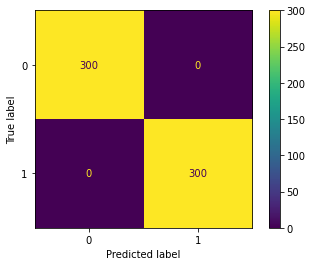

In [69]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()